<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad3_PDI_filtrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 3 Procesamiento Digital de Imagenes 2024
## Filtrado espacial

In [ ]:
# import de librerias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
from google.colab.patches import cv2_imshow   # eso este porque tiraba error el cv.imshow()

## Ejercicio 1:
Filtros pasa-bajos

1. Genere diferentes mascaras de promediado, utilizando filtro de promediado o caja (box filter) y el formato cruz. Aplique los filtros sobre una imagen y verifique los efectos de aumentar el tamaño de la mascara en la imagen resultante.
Ayuda: mask = np.ones((3,3),np.float32)/9

2. Genere mascaras de filtrado gaussianas con diferente σ y diferente tamaño. Visualice y aplique las mascaras sobre una imagen. Compare los resultados con los de un filtro de promediado del mismo tamaño.

3. Utilice el filtro de mediana sobre una imagen con diferentes tamaños de ventana. Compare los resultados con los filtros anteriores para un mismo tamaño.

4. Los filtros pasa-bajos pueden utilizarse para localizar objetos grandes en una escena. Aplique este concepto a la imagen ’hubble.tif’ y obtenga una imagen de grises cuyos objetos correspondan solamente a los de mayor tamaño de la original.

In [ ]:
def crear_filtro_promediador(kernel_size,tipo):
  if tipo == 0:
    # filtro de caja para suavizar una imagen reduciendo el ruido y eliminando detalles pequeños
    return np.ones((kernel_size,kernel_size),np.float32) / (kernel_size*kernel_size)
  else:
    # filtro de cruz
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    return filtro / kernel_size

In [ ]:
def crear_filtro_gausiano(kernel_size,var):
  aux = cv2.getGaussianKernel(kernel_size, var) # devuelve un vector gaussiano
  filtro = np.outer(aux, aux.transpose()) # hago el producto matricial de vector por el traspuesto para obtener una matriz gaussiana
  return filtro # supuestamente esta sin normalizar el filtro gausiano

In [ ]:
# direccion de la imagen
img_url = 'cameraman.tif'
# cargo la imagen
img1 = cv2.imread(img_url,cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'imagen filtro cruz')

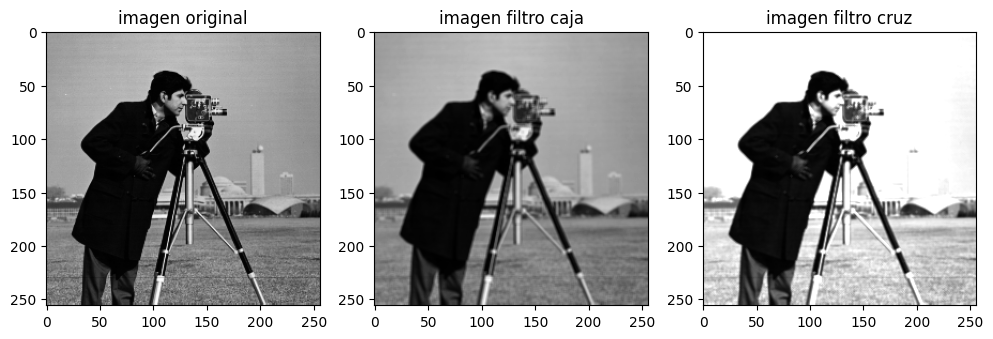

In [ ]:
# EJERCICIO 1.1

# tamaño del kernel
kernel_size = 3

# filtro de caja
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_1_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro de cruz realzar bordes y detalles en direcciones específicas.
  #Este filtro se asemeja a una cruz y se utiliza para resaltar características verticales u horizontales en una imagen
filtro_cruz = crear_filtro_promediador(kernel_size,tipo=1)
img1_1_cruz = cv2.filter2D(img1, -1, filtro_cruz)

# muestro las imagenes
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_1_caja,cmap='gray')
ax[1].set_title('imagen filtro caja')
ax[2].imshow(img1_1_cruz,cmap='gray')
ax[2].set_title('imagen filtro cruz')


Text(0.5, 1.0, 'imagen filtro gausiano, varianza: 1')

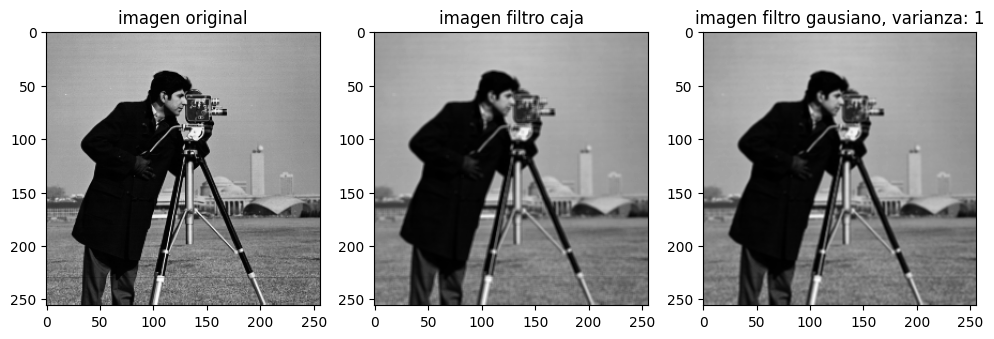

In [ ]:
# EJERCICIO 1.2

# tamaño del kernel
kernel_size = 3

# filtro de caja para comparar
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_2_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro gausiano. A diferencia de algunos otros filtros de suavizado,
  #el filtro gaussiano tiende a preservar los bordes importantes en la imagen
  #El grado de suavizado se controla mediante la desviación estándar del kernel gaussiano
  # y deterca mas los bordes.
varianza = 1
filtro_gauss = crear_filtro_gausiano(kernel_size,varianza)
img1_2_gauss = cv2.filter2D(img1, -1, filtro_gauss)

# muestro las imagenes
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_2_caja,cmap='gray')
ax[1].set_title('imagen filtro caja')
ax[2].imshow(img1_2_gauss,cmap='gray')
ax[2].set_title('imagen filtro gausiano, varianza: '+str(varianza))


Text(0.5, 1.0, 'filtro mediana: ')

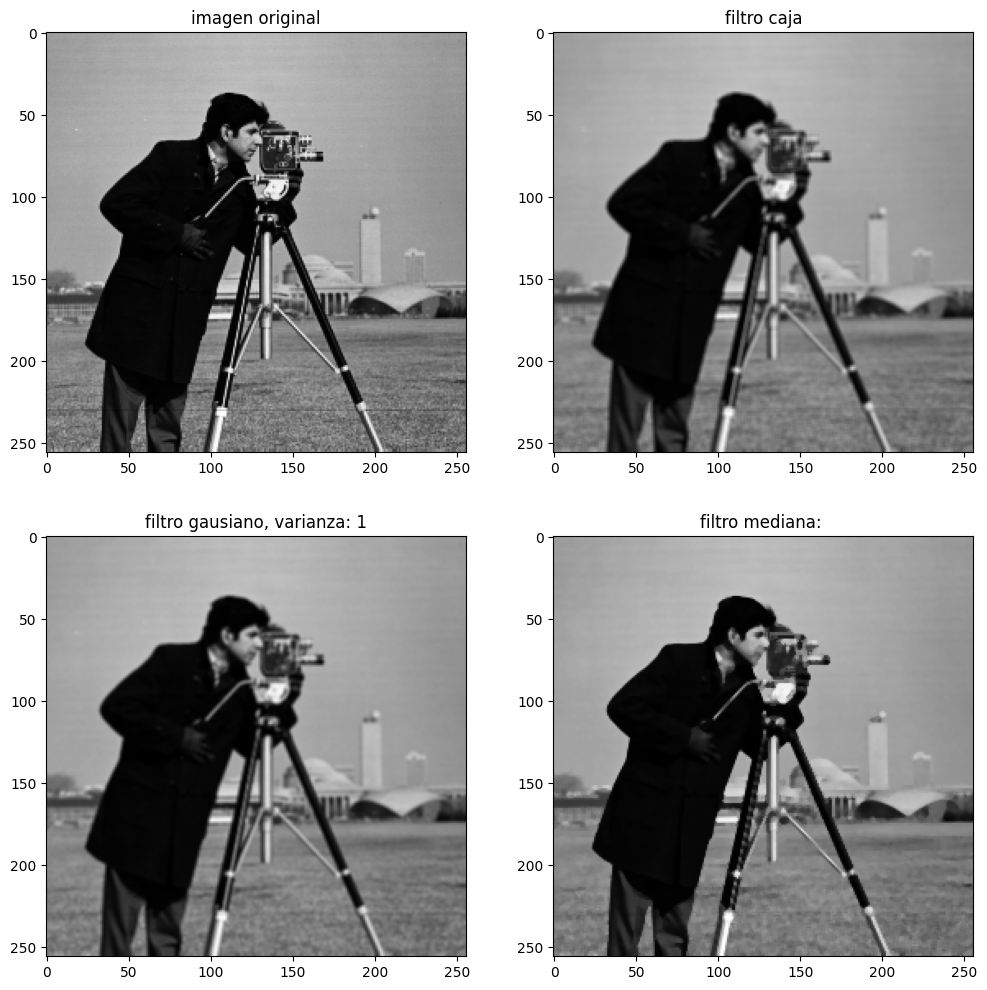

In [ ]:
# EJERCICIO 1.3
# tamaño del kernel
kernel_size = 3

# filtro de caja para comparar
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0)
img1_3_caja = cv2.filter2D(img1, -1, filtro_caja)

# filtro gausiano
varianza = 1
filtro_gauss = crear_filtro_gausiano(kernel_size,varianza)
img1_3_gauss = cv2.filter2D(img1, -1, filtro_gauss)

# filtro de mediana
img1_3_mediana = cv2.medianBlur(img1, kernel_size)

# muestro las imagenes
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax[0,0].imshow(img1,cmap='gray')
ax[0,0].set_title('imagen original')
ax[0,1].imshow(img1_3_caja,cmap='gray')
ax[0,1].set_title('filtro caja')
ax[1,0].imshow(img1_3_gauss,cmap='gray')
ax[1,0].set_title('filtro gausiano, varianza: '+str(varianza))
ax[1,1].imshow(img1_3_mediana,cmap='gray')
ax[1,1].set_title('filtro mediana: ')

In [ ]:
# EJERCICIO 1.4
img1_4 = cv2.imread('hubble.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'filtro gauss, var: 2')

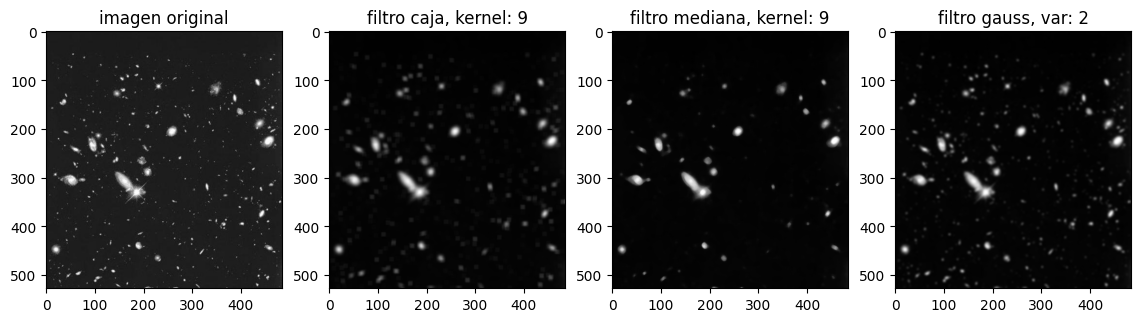

In [ ]:
kernel_size =9
# filtro caja
filtro4 = crear_filtro_promediador(kernel_size,tipo=0)
img1_4_caja = cv2.filter2D(img1_4, -1, filtro4)
# filtro mediana .especialmente útil para eliminar el ruido impulsivo, como el ruido de sal y pimienta,
  #mientras se preservan los bordes en la imagen
img1_4_med = cv2.medianBlur(img1_4,kernel_size)
# filtro gaussiano
var = 2
filtro_gauss = crear_filtro_gausiano(kernel_size,var)
img1_4_gaus = cv2.filter2D(img1_4, -1, filtro_gauss)

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(14,12))
ax[0].imshow(img1_4,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img1_4_caja,cmap='gray')
ax[1].set_title('filtro caja, kernel: '+str(kernel_size))
ax[2].imshow(img1_4_med,cmap='gray')
ax[2].set_title('filtro mediana, kernel: '+str(kernel_size))
ax[3].imshow(img1_4_gaus,cmap='gray')
ax[3].set_title('filtro gauss, var: '+str(var))

### Se puede apreciar que el filtro de mediana es el que mejor resultados muestra, ya que aquellos objetos pequeños son los que menos se ven luego de aplicar el filtro

## Ejercicio 2:
Filtros pasa-altos

1. Defina mascaras de filtrado pasa-altos cuyos coeficientes sumen 1 y aplıquelas sobre diferentes im´agenes. Interprete los resultados.

2. Repita el ejercicio anterior para mascaras cuyos coeficientes sumen 0. Compare los resultados con los del punto anterior.

In [ ]:
#filters sum one cross and box
def crear_filtro_pasa_alto(kernel_size,suma):
  if suma == 1: #cross
    filtro = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    filtro[:, int(kernel_size/2)] = 1.0
    filtro[int(kernel_size/2), :] = 1.0
    filtro[int(kernel_size/2), int(kernel_size/2)] = 2*kernel_size-1
    print(filtro)
    return filtro / np.sum(filtro)
  else: #box
    filtro = (-1)*np.ones((kernel_size,kernel_size),np.float32)
    filtro[int(kernel_size/2), int(kernel_size/2)] = kernel_size*kernel_size -1
    return filtro

[[0. 1. 0.]
 [1. 5. 1.]
 [0. 1. 0.]]
filtro suma 1 tipo cruz
[[0.         0.11111111 0.        ]
 [0.11111111 0.5555556  0.11111111]
 [0.         0.11111111 0.        ]]
---------------------------
filtro suma 1 tipo caja
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


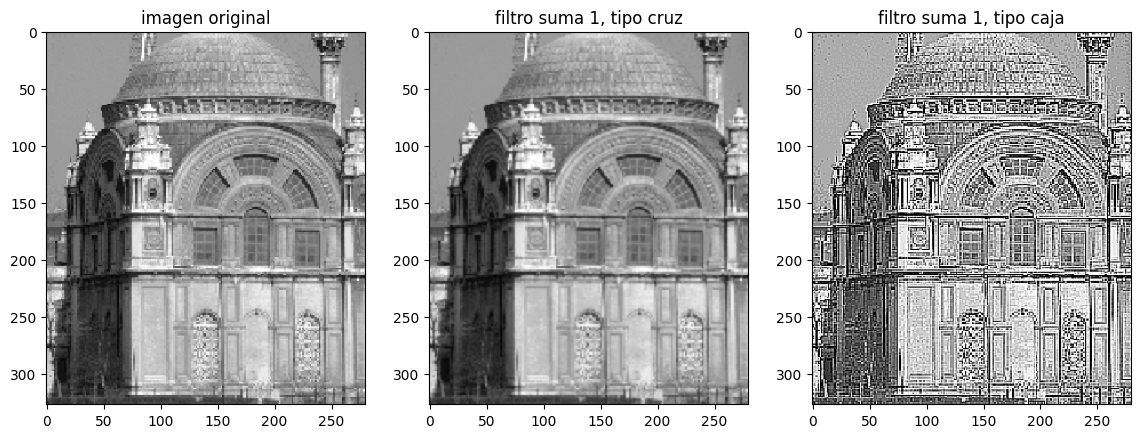

In [ ]:
# EJERCICIO 2.1
img2_1 = cv2.imread('estanbul.tif',cv2.IMREAD_GRAYSCALE)

# filtro suma 1
# tipo cruz
filtro_suma1_cruz = crear_filtro_pasa_alto(kernel_size=3,suma=1)
img2_1_suma1_cruz = cv2.filter2D(img2_1, -1, filtro_suma1_cruz)
# tipo caja
filtro_suma1_caja = (-1)*np.ones((3,3),np.float32)
filtro_suma1_caja[1,1] = 9
filtro_suma1_caja = filtro_suma1_caja / np.sum(filtro_suma1_caja)
img2_1_suma1_caja = cv2.filter2D(img2_1, -1, filtro_suma1_caja)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,12))
ax[0].imshow(img2_1,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img2_1_suma1_cruz,cmap='gray')
ax[1].set_title('filtro suma 1, tipo cruz')
ax[2].imshow(img2_1_suma1_caja,cmap='gray')
ax[2].set_title('filtro suma 1, tipo caja')

print('filtro suma 1 tipo cruz')
print(filtro_suma1_cruz)
print('---------------------------')
print('filtro suma 1 tipo caja')
print(filtro_suma1_caja)


filtro suma 0 tipo cruz
[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]
---------------------------
filtro suma 0 tipo caja
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


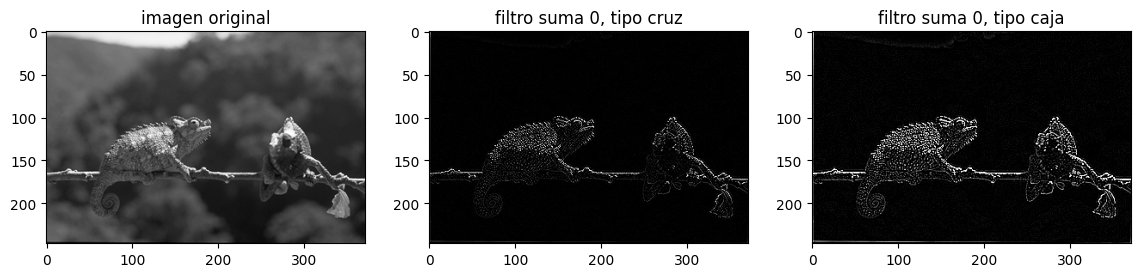

In [ ]:
# EJERCICIO 2.2
img2_2 = cv2.imread('camaleon.tif',cv2.IMREAD_GRAYSCALE)

# filtro suma 0
# tipo caja
filtro_suma0_caja = crear_filtro_pasa_alto(kernel_size=3,suma=0)
img2_2_suma0_caja = cv2.filter2D(img2_2, -1, filtro_suma0_caja)
# tipo cruz
filtro_suma0_cruz = np.zeros((3,3),np.float32)
filtro_suma0_cruz[:, 1] = -1.0
filtro_suma0_cruz[1, :] = -1.0
filtro_suma0_cruz[1,1] = 4
img2_2_suma0_cruz = cv2.filter2D(img2_2, -1, filtro_suma0_cruz)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,12))
ax[0].imshow(img2_2,cmap='gray')
ax[0].set_title('imagen original')
ax[1].imshow(img2_2_suma0_cruz,cmap='gray')
ax[1].set_title('filtro suma 0, tipo cruz')
ax[2].imshow(img2_2_suma0_caja,cmap='gray')
ax[2].set_title('filtro suma 0, tipo caja')

print('filtro suma 0 tipo cruz')
print(filtro_suma0_cruz)
print('---------------------------')
print('filtro suma 0 tipo caja')
print(filtro_suma0_caja)

## Ejercicio 3:
Filtros de acentuado

1. Obtenga versiones mejoradas de diferentes im´agenes mediante el filtrado por mascara difusa. Implemente el calculo como

    g(x,y) = f(x,y) −PB(f(x,y))

2. Una forma de enfatizar las altas frecuencias sin perder los detalles de bajas frecuencias es el filtrado de alta potencia. Implemente este procesamiento como la operacion aritmetica:

    g(x,y) = Af(x,y)−PB(f(x,y)), con A ≥ 1.

* Investigue y pruebe m´ etodos alternativos de c´alculo en una pasada.

Text(0.5, 1.0, 'mascara difusa ap cruz')

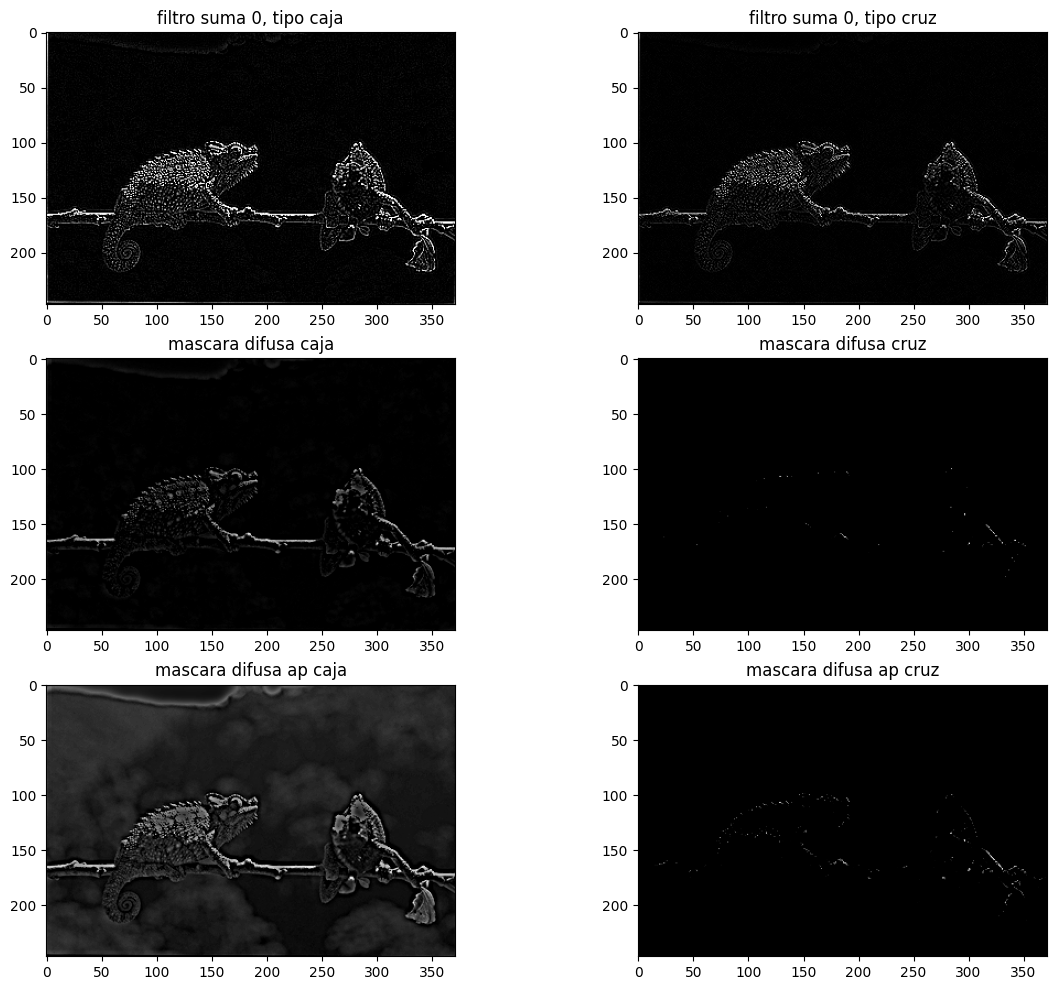

In [ ]:
img3 = cv2.imread('camaleon.tif',cv2.IMREAD_GRAYSCALE)
kernel_size = 9
filtro_caja = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
img3_suaviazada_caja = cv2.filter2D(img3, -1, filtro_caja)
filtro_cruz = crear_filtro_promediador(kernel_size,tipo=1) #  tipo 1 cruz
img3_suaviazada_cruz = cv2.filter2D(img3, -1, filtro_cruz)
#3.1 diffuse mask = it is a high pass filter that comes from the subtraccion
  # from the original image and an average of it
mascara_difusa_caja = cv2.subtract(img3,img3_suaviazada_caja)
mascara_difusa_cruz = cv2.subtract(img3,img3_suaviazada_cruz)
#3.2 diffuse mask high potential A > 1
A = 1.3
mascara_difusa_caja_alta_potencia = cv2.subtract(np.clip(A*img3, 0, 255).astype(np.uint8),img3_suaviazada_caja)
mascara_difusa_cruz_alta_potencia = cv2.subtract(np.clip(A*img3, 0, 255).astype(np.uint8),img3_suaviazada_cruz)
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(14,12))
ax[0,0].imshow(img2_2_suma0_caja,cmap='gray');ax[0,0].set_title('filtro suma 0, tipo caja')
ax[0,1].imshow(img2_2_suma0_cruz,cmap='gray');ax[0,1].set_title('filtro suma 0, tipo cruz')
ax[1,0].imshow(mascara_difusa_caja,cmap='gray');ax[1,0].set_title('mascara difusa caja')
ax[1,1].imshow(mascara_difusa_cruz,cmap='gray');ax[1,1].set_title('mascara difusa cruz')
ax[2,0].imshow(mascara_difusa_caja_alta_potencia,cmap='gray');ax[2,0].set_title('mascara difusa ap caja')
ax[2,1].imshow(mascara_difusa_cruz_alta_potencia,cmap='gray');ax[2,1].set_title('mascara difusa ap cruz')


## Ejercicio 4:
Trabajos de aplicacion

1. Proponga una combinacion de tecnicas para realzar los detalles de la imagen esqueleto.tif. Recuerde que esta tarea es subjetiva y depende de que pretende realzar. Justifique cada una de las elecciones en la elaboracion de su propuesta.

2. Aplique un filtro pasa-bajos de su eleccion y el filtro bilateral a las siguientes imagenes: mariposa02.png, flores02.jpg y lapices02.jpg (en escala de grises). Compare los resultados y explique sus apreciaciones. Utilice la funcion implementada en la guıa anterior para visualizar perfiles de grises, eligiendo la misma fila o columna para la imagen original y las que han sido filtradas. Compare los resultados visualizandolos simultaneamente.

[Opcional] Implemente una funcion que le permita extraer perfiles de grises de las 3 imagenes, de cualquier longitud y en cualquier direccion (a partir de clicks del mouse o mediante el ingreso de coordenadas) y que realice el ploteo de los perfiles superpuestos en diferentes colores.

Text(0.5, 1.0, 'log->exp->high filter sum zero')

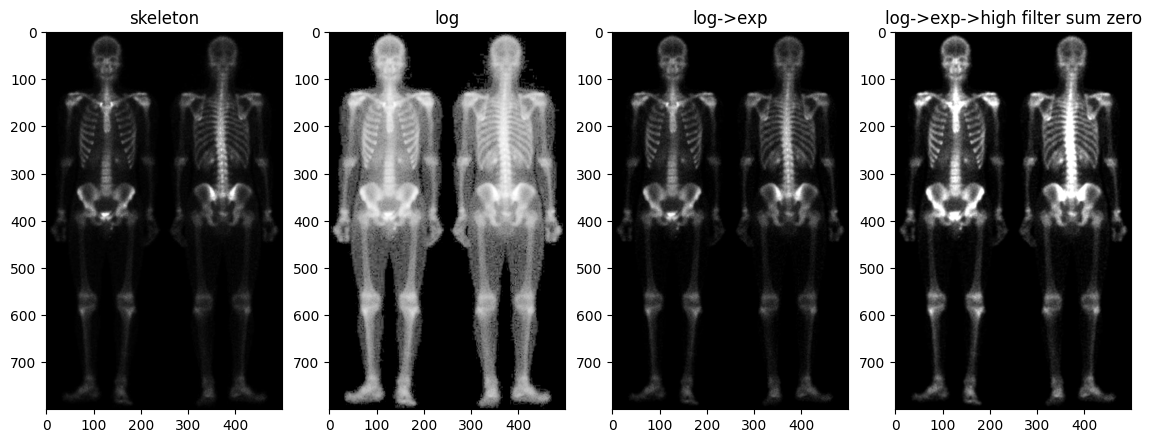

In [ ]:
#2.1
# it proposed to identify better the skeleton ribs
esqueleto =cv2.imread('esqueleto.tif',cv2.IMREAD_GRAYSCALE)
#firt we apply the logarithmic transformation to have better contrast
esqueleto_log = transformacion_logaritmica(esqueleto,c=1)
#than we apply tha exponential transformation to highlight whitest pixels
esqueleto_log_exp= transformacion_exponencial(esqueleto_log,c=1,alpha=4)
# for the last we apply cross smoothing filter because skeleton has right parts
  #and this method highlighs that
filtro = crear_filtro_promediador(kernel_size=3,tipo=1) #  tipo 1 cruz
suaviazada = cv2.filter2D(esqueleto, -1, filtro)
A = 1
mascara_difusa_alta_potencia = cv2.subtract(np.clip(A*esqueleto_log_exp, 0, 255).astype(np.uint8),suaviazada)

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(14,12))
ax[0].imshow(esqueleto,cmap='gray');ax[0].set_title('skeleton')
ax[1].imshow(esqueleto_log,cmap='gray');ax[1].set_title('log')
ax[2].imshow(esqueleto_log_exp,cmap='gray');ax[2].set_title('log->exp')
ax[3].imshow(suaviazada,cmap='gray');ax[3].set_title('log->exp->high filter sum zero')

In [ ]:
#this transformation highlights the black zones and hidden objects and
 #leaves the white zones almost the same
def transformacion_logaritmica(imagen_original,c):
  img_transformada = c*np.log1p(imagen_original.astype(np.float32))
  # normalizamos
  normalizada = (255 * img_transformada / np.max(img_transformada)).astype(np.uint8)
  return np.clip(c*normalizada, 0, 255)

In [ ]:
#this trasformation highlights the whites pixels and turn off the blackest and gray pixels
def transformacion_exponencial(imagen_original,c,alpha):
  img_transformada = c*np.power(imagen_original/255.0,alpha)
  # normalizamos
  normalizada = (255 * img_transformada / np.max(img_transformada)).astype(np.uint8)
  return np.clip(c*normalizada, 0, 255)

Text(0.5, 1.0, 'filtro bilateal lapices')

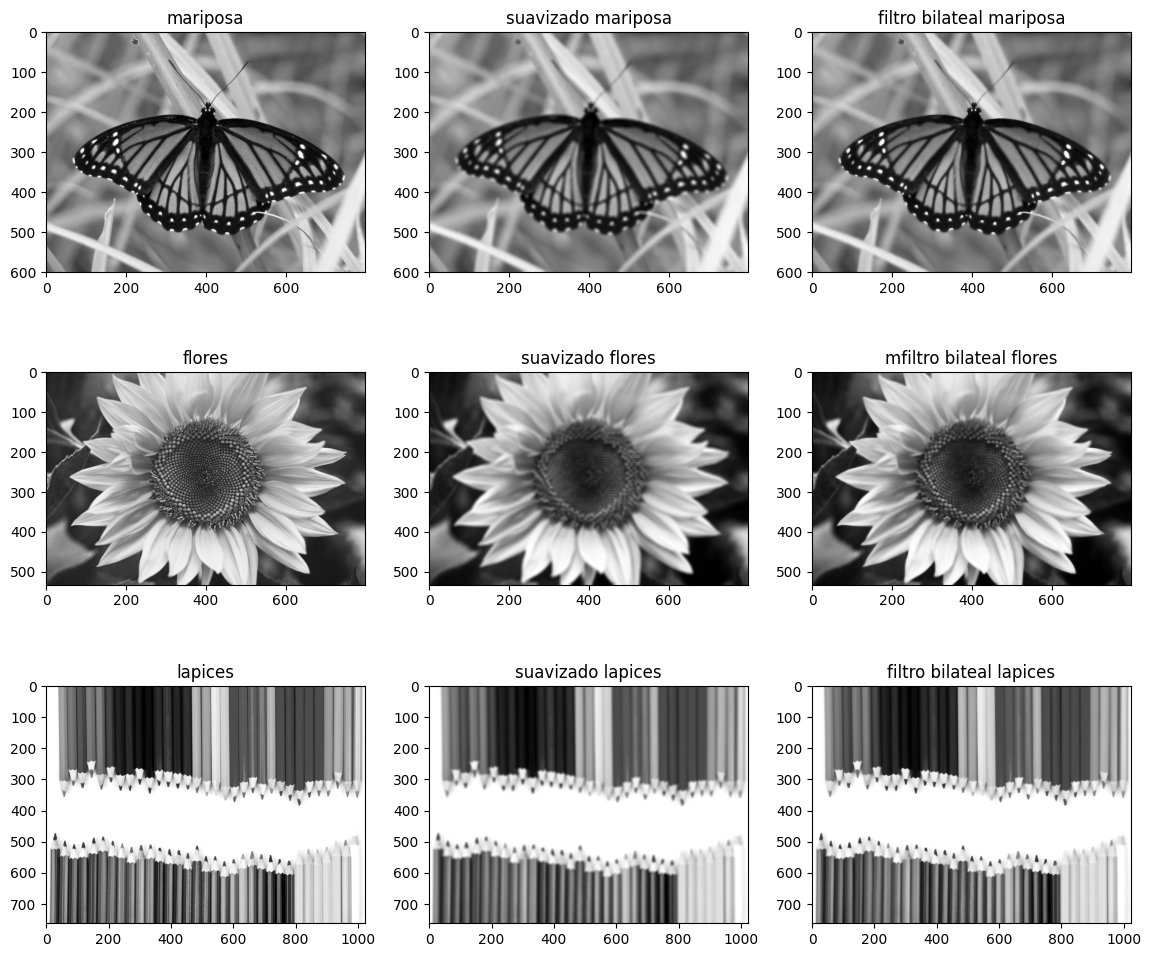

In [ ]:
#2.2
mariposa02 =cv2.imread('mariposa02.png',cv2.IMREAD_GRAYSCALE)
flores02 =cv2.imread('flores02.jpg',cv2.IMREAD_GRAYSCALE)
lapices02 =cv2.imread('lapices02.jpg',cv2.IMREAD_GRAYSCALE)

#common smoothing filters
kernel_size = 9
filtro_mapiposa = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
mariposa_suaviazada = cv2.filter2D(mariposa02, -1, filtro_caja)
filtro_flores = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
flores_suaviazada = cv2.filter2D(flores02, -1, filtro_caja)
filtro_lapices = crear_filtro_promediador(kernel_size,tipo=0) # tipo 0 caja
lapices_suaviazada = cv2.filter2D(lapices02, -1, filtro_caja)

#bilateral filter: taking into account both the spatial distance and diferent in intensity
  # the bilateral filter is able to soften the image while preserving the important edges and details
d = 9             # Diameter of each pixel neighborhood
sigma_color = 75  # Filter sigma in the color space
sigma_space = 75  # Filter sigma in the coordinate space
bf_mariposa = cv2.bilateralFilter(mariposa02, d, sigma_color, sigma_space)
bf_flores = cv2.bilateralFilter(flores02, d, sigma_color, sigma_space)
bf_lapices = cv2.bilateralFilter(lapices02, d, sigma_color, sigma_space)

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(14,12))
ax[0,0].imshow(mariposa02,cmap='gray');ax[0,0].set_title('mariposa')
ax[0,1].imshow(mariposa_suaviazada,cmap='gray');ax[0,1].set_title('suavizado mariposa')
ax[0,2].imshow(bf_mariposa,cmap='gray');ax[0,2].set_title('filtro bilateal mariposa')

ax[1,0].imshow(flores02,cmap='gray');ax[1,0].set_title('flores')
ax[1,1].imshow(flores_suaviazada,cmap='gray');ax[1,1].set_title('suavizado flores')
ax[1,2].imshow(bf_flores,cmap='gray');ax[1,2].set_title('mfiltro bilateal flores')

ax[2,0].imshow(lapices02,cmap='gray');ax[2,0].set_title('lapices')
ax[2,1].imshow(lapices_suaviazada,cmap='gray');ax[2,1].set_title('suavizado lapices')
ax[2,2].imshow(bf_lapices,cmap='gray');ax[2,2].set_title('filtro bilateal lapices')


Text(0.5, 1.0, 'intensity with bilateral filter')

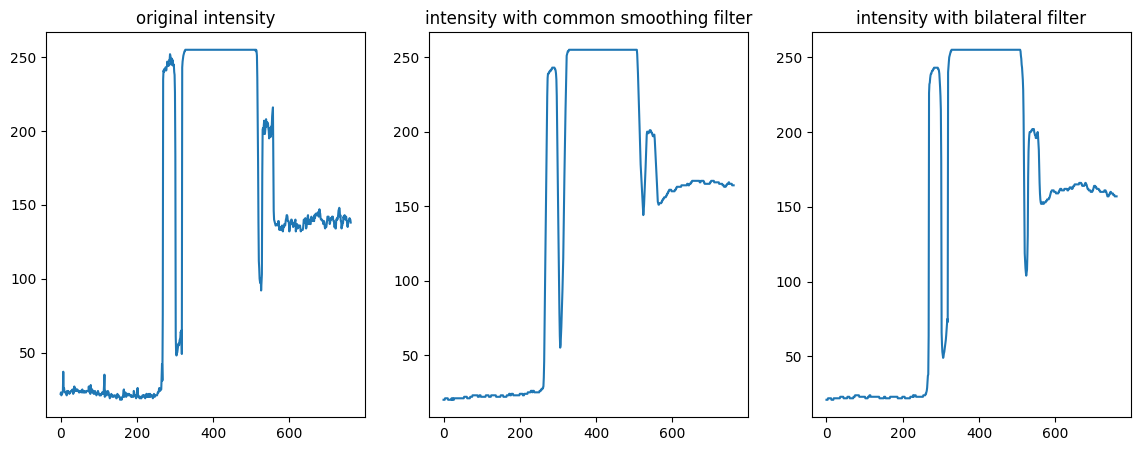

In [ ]:
# eligimos fila 300 de lapices
fila = 300
# obtengo la intensidad de toda la fila
intensidad_original = lapices02[:,fila]
intensidad_suaviazada = lapices_suaviazada[:,fila]
intensidad_bilateral = bf_lapices[:,fila]

# dibujo la linea
#cv.line(img_gray2_c, (col,0), (col,m), color=(0, 255, 0) , thickness=4)
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
ax2[0].plot(intensidad_original); ax2[0].set_title("original intensity")
ax2[1].plot(intensidad_suaviazada);ax2[1].set_title("intensity with common smoothing filter")
ax2[2].plot(intensidad_bilateral);ax2[2].set_title("intensity with bilateral filter")